# Project name
## Analysing the work of users in the system

IMPORT LIBRARY

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Приложение №1 (АСУ Ш-2).xlsx', sheet_name = 0)

In [3]:
data

,Предприятие,Сотрудник,Событие,Логин,Дата,Задача,IP адрес
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,SHCHD,31.05.2021 23:51:39,КЗ АЛСН,10.115.240.200
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,SHCHD,31.05.2021 23:29:19,КЗ АЛСН,10.115.212.147
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,SHCHD,31.05.2021 23:26:45,КЗ УО-ЖАТС,10.115.240.200
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,SHCHD,31.05.2021 23:20:55,КЗ УО-ЖАТС,10.115.201.2
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,SHCHD,31.05.2021 23:07:31,КЗ УО-ЖАТС,10.115.212.147
...,...,...,...,...,...,...,...
14233,ШЧ-8 ПРИВ,Котельникова О. В.,Блокировка,SHCH8_KOV,22.01.2020 17:12:19,NaN,10.115.232.135
14234,NaN,NaN,Разблокировка,NaN,15.01.2020 01:30:00,Регистрац.,10.115.236.46
14235,ШЧ-14 ПРИВ,Рыжонков С. В.,Блокировка,S14_RYZHONKOV,15.01.2020 00:58:13,NaN,10.115.236.46
14236,NaN,NaN,Разблокировка,NaN,13.01.2020 14:02:43,СЗИ,10.115.201.55


We have columns:  
Предприятие - work place  
Сотрудник -  Employee  
Событие  - Event  
Логин  - Login  
Дата  - Date  
Задача -  System  
IP адрес - IP  

columns have Cyrillic designations, so to refer to them correctly, let's rename them

In [4]:
data = data.rename(columns = {'Предприятие':'Organisation',
                              'Сотрудник': 'Employee',
                              'Событие': 'Event',
                              'Логин': 'Login',
                              'Дата': 'Date',
                             'Задача': 'System'}
                  )

In [5]:
data

,Organisation,Employee,Event,Login,Date,System,IP адрес
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,SHCHD,31.05.2021 23:51:39,КЗ АЛСН,10.115.240.200
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,SHCHD,31.05.2021 23:29:19,КЗ АЛСН,10.115.212.147
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,SHCHD,31.05.2021 23:26:45,КЗ УО-ЖАТС,10.115.240.200
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,SHCHD,31.05.2021 23:20:55,КЗ УО-ЖАТС,10.115.201.2
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,SHCHD,31.05.2021 23:07:31,КЗ УО-ЖАТС,10.115.212.147
...,...,...,...,...,...,...,...
14233,ШЧ-8 ПРИВ,Котельникова О. В.,Блокировка,SHCH8_KOV,22.01.2020 17:12:19,NaN,10.115.232.135
14234,NaN,NaN,Разблокировка,NaN,15.01.2020 01:30:00,Регистрац.,10.115.236.46
14235,ШЧ-14 ПРИВ,Рыжонков С. В.,Блокировка,S14_RYZHONKOV,15.01.2020 00:58:13,NaN,10.115.236.46
14236,NaN,NaN,Разблокировка,NaN,13.01.2020 14:02:43,СЗИ,10.115.201.55


In [6]:
# delete it because it doesn't make any sense
data.drop(columns = ['IP адрес','Login'],inplace = True)

In [7]:
data

,Organisation,Employee,Event,Date,System
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:51:39,КЗ АЛСН
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,31.05.2021 23:29:19,КЗ АЛСН
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:26:45,КЗ УО-ЖАТС
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,31.05.2021 23:20:55,КЗ УО-ЖАТС
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,31.05.2021 23:07:31,КЗ УО-ЖАТС
...,...,...,...,...,...
14233,ШЧ-8 ПРИВ,Котельникова О. В.,Блокировка,22.01.2020 17:12:19,NaN
14234,NaN,NaN,Разблокировка,15.01.2020 01:30:00,Регистрац.
14235,ШЧ-14 ПРИВ,Рыжонков С. В.,Блокировка,15.01.2020 00:58:13,NaN
14236,NaN,NaN,Разблокировка,13.01.2020 14:02:43,СЗИ


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14238 entries, 0 to 14237
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Organisation  14168 non-null  object
 1   Employee      13881 non-null  object
 2   Event         14238 non-null  object
 3   Date          14238 non-null  object
 4   System        9182 non-null   object
dtypes: object(5)
memory usage: 556.3+ KB


In [9]:
data.isna().sum()

Organisation      70
Employee         357
Event              0
Date               0
System          5056
dtype: int64

There are gaps in all columns except for Event, Date

We can delete the System column, because it specifies a subsystem, and we are interested in the essence of work in the main system.

In [10]:
data.drop(columns = ['System'],inplace = True)

In [11]:
data

,Organisation,Employee,Event,Date
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,31.05.2021 23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,31.05.2021 23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,31.05.2021 23:07:31
...,...,...,...,...
14233,ШЧ-8 ПРИВ,Котельникова О. В.,Блокировка,22.01.2020 17:12:19
14234,NaN,NaN,Разблокировка,15.01.2020 01:30:00
14235,ШЧ-14 ПРИВ,Рыжонков С. В.,Блокировка,15.01.2020 00:58:13
14236,NaN,NaN,Разблокировка,13.01.2020 14:02:43


In [12]:
data[data.duplicated() == True]

,Organisation,Employee,Event,Date
1608,ШЧ-6 (Э) ПРИВ,Кочергина Г. В.,Вход,25.05.2021 12:43:36
2072,ШЧ-3 (Э) ПРИВ,Марин А. В.,Вход,24.05.2021 08:34:59
2073,ШЧ-3 (Э) ПРИВ,Марин А. В.,Вход,24.05.2021 08:34:59
2379,ШЧ-8 ПРИВ,Доценко Д. В.,Вход,22.05.2021 15:40:25
3198,ШЧ-3 (Э) ПРИВ,Ефимов Р. А.,Выход,19.05.2021 16:45:03
...,...,...,...,...
13890,ПРИВ Ж.Д.,Зенюков С. В.,Изменение лич.данных,13.04.2021 10:23:58
13894,ПРИВ Ж.Д.,Зенюков С. В.,Изменение лич.данных,13.04.2021 10:19:59
13986,ПРИВ Ж.Д.,NaN,Нарушение целостности СЗИ,13.04.2021 09:14:05
14144,NaN,NaN,Разблокировка,19.11.2020 20:21:08


In [13]:
data.duplicated().sum()

81

In [14]:
data.drop_duplicates().reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14157 entries, 0 to 14156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Organisation  14089 non-null  object
 1   Employee      13804 non-null  object
 2   Event         14157 non-null  object
 3   Date          14157 non-null  object
dtypes: object(4)
memory usage: 442.5+ KB


In [15]:
print('% is null in df')
data.isna().mean() * 100

% is null in df


Organisation    0.491642
Employee        2.507375
Event           0.000000
Date            0.000000
dtype: float64

In [16]:
data = data.dropna()

In [17]:
data.reset_index(drop=True)

,Organisation,Employee,Event,Date
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,31.05.2021 23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,31.05.2021 23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,31.05.2021 23:07:31
...,...,...,...,...
13876,ШЧ-6 (Э) ПРИВ,Крошкин М. А.,Блокировка,31.01.2020 10:08:52
13877,ПРИВ Ж.Д.,Зверев И. В.,Блокировка,29.01.2020 09:21:24
13878,ШЧ-8 ПРИВ,Котельникова О. В.,Блокировка,22.01.2020 17:12:19
13879,ШЧ-14 ПРИВ,Рыжонков С. В.,Блокировка,15.01.2020 00:58:13


In [18]:
print('% is null in df')
data.isna().mean() * 100

% is null in df


Organisation    0.0
Employee        0.0
Event           0.0
Date            0.0
dtype: float64

In [19]:
data.describe()

,Organisation,Employee,Event,Date
count,13881,13881,13881,13881
unique,23,270,8,13577
top,ШЧ-6 (Э) ПРИВ,Федосеева Н. С.,Вход,16.04.2021 17:48:20
freq,2341,891,6688,9


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13881 entries, 0 to 14237
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Organisation  13881 non-null  object
 1   Employee      13881 non-null  object
 2   Event         13881 non-null  object
 3   Date          13881 non-null  object
dtypes: object(4)
memory usage: 542.2+ KB


In [21]:
#data['Organisation'].unique()

In [22]:
data
data.reset_index(drop=True)

,Organisation,Employee,Event,Date
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,31.05.2021 23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,31.05.2021 23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,31.05.2021 23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,31.05.2021 23:07:31
...,...,...,...,...
13876,ШЧ-6 (Э) ПРИВ,Крошкин М. А.,Блокировка,31.01.2020 10:08:52
13877,ПРИВ Ж.Д.,Зверев И. В.,Блокировка,29.01.2020 09:21:24
13878,ШЧ-8 ПРИВ,Котельникова О. В.,Блокировка,22.01.2020 17:12:19
13879,ШЧ-14 ПРИВ,Рыжонков С. В.,Блокировка,15.01.2020 00:58:13


In [206]:
data['Date'].min()

Timestamp('2020-01-09 12:30:24')

In [207]:
data['Date'].max()

Timestamp('2021-12-05 23:37:12')

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

data['Organisation'] = data['Organisation'].apply(str)



data['Employee'] = data['Employee'].astype(str)


data['Event'] = data['Event'].apply(str)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13881 entries, 0 to 14237
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Organisation  13881 non-null  object        
 1   Employee      13881 non-null  object        
 2   Event         13881 non-null  object        
 3   Date          13881 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 542.2+ KB


In [25]:
data['Event'].unique()

array(['Выход', 'Вход', 'Неуспешный вход', 'Работа с задачей',
       'Изменение прав', 'Блокировка', 'Изменение лич.данных',
       'Создание пользователя'], dtype=object)

In [ ]:
### Having analysed the statuses I found a few that are not related to user work, but to admin functionsso we will separate them into a separate dataframe.

admin_df = data.query('Event == "Изменение лич.данных" or Event == "Изменение прав" or Event == "Создание пользователя" or Event == "Блокировка"')
admin_df

In [27]:
len(admin_df)

134

In [28]:
filtered_df = data[~data.isin(admin_df)].dropna()
filtered_df

,Organisation,Employee,Event,Date
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,2021-05-31 23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,2021-05-31 23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,2021-05-31 23:07:31
...,...,...,...,...
14091,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13 01:43:25
14092,ШЧ-14 ПРИВ,Ткаченко В. Е.,Выход,2021-04-13 01:12:30
14093,ШЧ-14 ПРИВ,Ткаченко В. Е.,Вход,2021-04-13 01:12:29
14094,ШЧ-14 ПРИВ,Ткаченко В. Е.,Неуспешный вход,2021-04-13 01:12:21


In [29]:
filtered_df.query('Event == "Неуспешный вход"').sort_values(by = 'Employee')

,Organisation,Employee,Event,Date
296,ШЧ-13 (Р) ПРИВ,Абрамов Н. В.,Неуспешный вход,2021-05-31 07:59:26
298,ШЧ-13 (Р) ПРИВ,Абрамов Н. В.,Неуспешный вход,2021-05-31 07:58:53
11629,ПРИВ Ж.Д.,АдминПТК В. Ц.,Неуспешный вход,2021-04-19 15:56:40
11631,ПРИВ Ж.Д.,АдминПТК В. Ц.,Неуспешный вход,2021-04-19 15:56:35
10358,ПРИВ Ж.Д.,АдминПТК В. Ц.,Неуспешный вход,2021-04-22 11:00:49
...,...,...,...,...
8349,ШЧ-10 ПРИВ,Яковлева М. А.,Неуспешный вход,2021-04-28 21:27:53
9354,ШЧ-10 ПРИВ,Яковлева М. А.,Неуспешный вход,2021-04-26 10:45:14
7940,ШЧ-6 (Э) ПРИВ,Ярошевич В. В.,Неуспешный вход,2021-04-29 20:33:35
7942,ШЧ-6 (Э) ПРИВ,Ярошевич В. В.,Неуспешный вход,2021-04-29 20:30:34


In [30]:
filtered_df.query('Employee == "АдминПТК В. Ц."')

,Organisation,Employee,Event,Date
10358,ПРИВ Ж.Д.,АдминПТК В. Ц.,Неуспешный вход,2021-04-22 11:00:49
11629,ПРИВ Ж.Д.,АдминПТК В. Ц.,Неуспешный вход,2021-04-19 15:56:40
11631,ПРИВ Ж.Д.,АдминПТК В. Ц.,Неуспешный вход,2021-04-19 15:56:35


### we will overwrite the dataframe because the user АдминПТК В. Ц.  is a user who performs system state monitoring and cannot be counted as a user and administrator.

In [31]:
filtered_df = filtered_df[filtered_df['Employee'] != 'АдминПТК В. Ц.']
filtered_df

,Organisation,Employee,Event,Date
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,2021-05-31 23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,2021-05-31 23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,2021-05-31 23:07:31
...,...,...,...,...
14091,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13 01:43:25
14092,ШЧ-14 ПРИВ,Ткаченко В. Е.,Выход,2021-04-13 01:12:30
14093,ШЧ-14 ПРИВ,Ткаченко В. Е.,Вход,2021-04-13 01:12:29
14094,ШЧ-14 ПРИВ,Ткаченко В. Е.,Неуспешный вход,2021-04-13 01:12:21


### let's also remove the "unsuccessful login" status. Because it is an attempt to enter and cannot be counted as working time.

In [32]:
filtered_df = filtered_df[filtered_df['Event'] != 'Неуспешный вход']
filtered_df

,Organisation,Employee,Event,Date
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,2021-05-31 23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,2021-05-31 23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,2021-05-31 23:07:31
...,...,...,...,...
14089,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13 04:29:37
14090,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Выход,2021-04-13 01:43:25
14091,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13 01:43:25
14092,ШЧ-14 ПРИВ,Ткаченко В. Е.,Выход,2021-04-13 01:12:30


In [35]:
print(filtered_df['Date'].min())
print(filtered_df['Date'].max())

2021-01-05 00:07:31
2021-12-05 23:37:12


In [33]:
filtered_df['Time'] = pd.to_datetime(filtered_df['Date']).dt.time
filtered_df

,Organisation,Employee,Event,Date,Time
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:51:39,23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,2021-05-31 23:29:19,23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31 23:26:45,23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,2021-05-31 23:20:55,23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,2021-05-31 23:07:31,23:07:31
...,...,...,...,...,...
14089,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13 04:29:37,04:29:37
14090,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Выход,2021-04-13 01:43:25,01:43:25
14091,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13 01:43:25,01:43:25
14092,ШЧ-14 ПРИВ,Ткаченко В. Е.,Выход,2021-04-13 01:12:30,01:12:30


In [34]:
filtered_df['Date'] = pd.to_datetime(filtered_df['Date']).dt.date
filtered_df

,Organisation,Employee,Event,Date,Time
0,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31,23:51:39
1,ШЧ-1 ПРИВ,Байбеков К. Ш.,Вход,2021-05-31,23:29:19
2,ШЧ-3 (Э) ПРИВ,Маштакова В. В.,Выход,2021-05-31,23:26:45
3,ШЧ-6 (Э) ПРИВ,Рахманкулова А. А.,Выход,2021-05-31,23:20:55
4,ШЧ-1 ПРИВ,Байбеков К. Ш.,Выход,2021-05-31,23:07:31
...,...,...,...,...,...
14089,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13,04:29:37
14090,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Выход,2021-04-13,01:43:25
14091,ШЧ-7 (Э) ПРИВ,Евстифеева Н. В.,Вход,2021-04-13,01:43:25
14092,ШЧ-14 ПРИВ,Ткаченко В. Е.,Выход,2021-04-13,01:12:30


In [105]:
filtered_df.groupby(['Organisation','Employee','Event'])['Event'].agg('count').head(30).sort_values(ascending = False)

Organisation  Employee         Event           
ПРИВ Ж.Д.     Бынеева Е. А.    Вход                94
                               Выход               92
ИЧ-1 Ш ПРИВ   Михно Н. В.      Вход                44
                               Выход               41
ПРИВ Ж.Д.     Беспалова Н. П.  Вход                22
                               Выход               21
              Бочаров А. А.    Вход                16
                               Выход               15
ИЧ-1 Ш ПРИВ   Утепов Р. М.     Вход                13
                               Выход               12
ПРИВ Ж.Д.     Быков В. Ю.      Вход                12
              Волков А. А.     Вход                10
ИЧ-1 Ш ПРИВ   Петрушкин О. А.  Вход                 7
ПРИВ Ж.Д.     Быков В. Ю.      Выход                6
              Васильева Е. Н.  Вход                 5
ИЧ-1 Ш ПРИВ   Матюков С. Н.    Вход                 5
                               Выход                5
              Петрушкин О. А.  Вых

<Axes: >

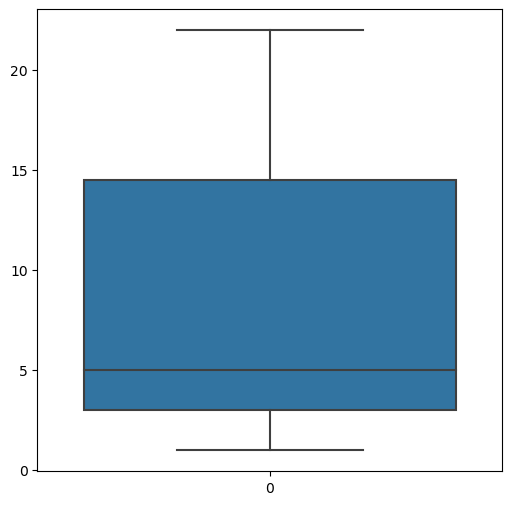

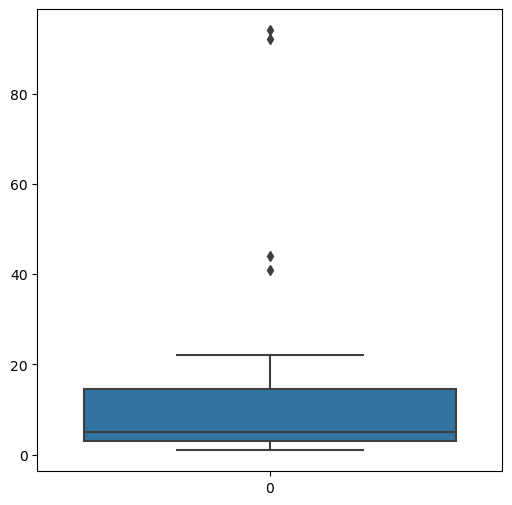

In [113]:
plt.figure(figsize=(6, 6))
sns.boxplot(filtered_df.groupby(['Organisation','Employee','Event'])['Event'].agg('count').head(30).sort_values(ascending = False),showfliers=False)

plt.figure(figsize=(6, 6))
sns.boxplot(filtered_df.groupby(['Organisation','Employee','Event'])['Event'].agg('count').head(30).sort_values(ascending = False))

In [110]:
filtered_df.groupby(['Organisation','Employee','Event'])['Event'].agg('count').head(30).sort_values(ascending = False).describe()

count    30.000000
mean     15.166667
std      23.674638
min       1.000000
25%       3.000000
50%       5.000000
75%      14.500000
max      94.000000
Name: Event, dtype: float64

In [111]:
filtered_df.groupby(['Organisation','Employee','Event'])['Event'].agg('count').head(30).sort_values(ascending = False).median()

5.0

### Let's analyse separately the statuses "Вход/выход"" and "Работа с задачей"

In [82]:
work_in_sys = filtered_df.query('Event == "Работа с задачей"').groupby(['Organisation','Employee','Event','Date','Time'])['Event'].count()

work_in_sys= pd.DataFrame(work_in_sys)
work_in_sys

Event
Organisation Employee        Event            Date       Time           
ПРИВ Ж.Д.    Васильева Е. Н. Работа с задачей 2021-05-05 22:52:45      1
                                                         23:21:18      3
ШЧ-10 ПРИВ   Боженов А. В.   Работа с задачей 2021-04-28 15:47:55      1
             Рябова Ю. С.    Работа с задачей 2021-05-30 23:07:20      1
ШЧ-14 ПРИВ   Захаров Д. А.   Работа с задачей 2021-05-31 16:14:38      1
ШЧ-8 ПРИВ    Валькова Г. В.  Работа с задачей 2021-05-13 06:29:36      1
             Лапшина Е. В.   Работа с задачей 2021-04-20 05:28:02      1
ЭЧ-4 ПРИВ    Рура И. А.      Работа с задачей 2021-04-26 11:04:01      1

In [86]:
filtered_df.query('Employee == "Васильева Е. Н." or Employee == "Боженов А. В."').sort_values(by = ['Employee','Time','Date'])

,Organisation,Employee,Event,Date,Time
7242,ШЧ-10 ПРИВ,Боженов А. В.,Выход,2021-03-05,05:27:39
7240,ШЧ-10 ПРИВ,Боженов А. В.,Вход,2021-03-05,05:32:25
7049,ШЧ-10 ПРИВ,Боженов А. В.,Выход,2021-04-05,07:01:38
7044,ШЧ-10 ПРИВ,Боженов А. В.,Выход,2021-04-05,07:37:36
7218,ШЧ-10 ПРИВ,Боженов А. В.,Вход,2021-03-05,08:20:20
5528,ШЧ-10 ПРИВ,Боженов А. В.,Выход,2021-12-05,08:32:53
9348,ШЧ-10 ПРИВ,Боженов А. В.,Вход,2021-04-26,10:47:51
9347,ШЧ-10 ПРИВ,Боженов А. В.,Вход,2021-04-26,10:48:56
9346,ШЧ-10 ПРИВ,Боженов А. В.,Выход,2021-04-26,10:49:43
5822,ШЧ-10 ПРИВ,Боженов А. В.,Вход,2021-11-05,10:49:47


In [116]:
filtered_df['Event_code'] = 0

# Используем цикл for для обновления значений в новом столбце
for index, event in filtered_df['Event'].items():
    if event == 'Вход':
        filtered_df.loc[index, 'Event_code'] = 1
    elif event == 'Выход':
        filtered_df.loc[index, 'Event_code'] = 2
    else:
        filtered_df.loc[index, 'Event_code'] = 3
print(filtered_df)

        Organisation            Employee  Event        Date      Time  \
0      ШЧ-3 (Э) ПРИВ     Маштакова В. В.  Выход  2021-05-31  23:51:39   
1          ШЧ-1 ПРИВ      Байбеков К. Ш.   Вход  2021-05-31  23:29:19   
2      ШЧ-3 (Э) ПРИВ     Маштакова В. В.  Выход  2021-05-31  23:26:45   
3      ШЧ-6 (Э) ПРИВ  Рахманкулова А. А.  Выход  2021-05-31  23:20:55   
4          ШЧ-1 ПРИВ      Байбеков К. Ш.  Выход  2021-05-31  23:07:31   
...              ...                 ...    ...         ...       ...   
14089  ШЧ-7 (Э) ПРИВ    Евстифеева Н. В.   Вход  2021-04-13  04:29:37   
14090  ШЧ-7 (Э) ПРИВ    Евстифеева Н. В.  Выход  2021-04-13  01:43:25   
14091  ШЧ-7 (Э) ПРИВ    Евстифеева Н. В.   Вход  2021-04-13  01:43:25   
14092     ШЧ-14 ПРИВ      Ткаченко В. Е.  Выход  2021-04-13  01:12:30   
14093     ШЧ-14 ПРИВ      Ткаченко В. Е.   Вход  2021-04-13  01:12:29   

       Event_code  
0               2  
1               1  
2               2  
3               2  
4               2  
...

In [142]:
group_df = filtered_df.groupby(['Organisation','Employee','Event'])['Event_code'].agg('sum').head(50).sort_values(ascending = False)
group_df = pd.DataFrame(group_df).reset_index()
group_df

,Organisation,Employee,Event,Event_code
0,ПРИВ Ж.Д.,Горячева К. А.,Выход,214
1,ПРИВ Ж.Д.,Бынеева Е. А.,Выход,184
2,ПРИВ Ж.Д.,Горячева К. А.,Вход,109
3,ПРИВ Ж.Д.,Бынеева Е. А.,Вход,94
4,ИЧ-1 Ш ПРИВ,Михно Н. В.,Выход,82
5,ИЧ-1 Ш ПРИВ,Михно Н. В.,Вход,44
6,ПРИВ Ж.Д.,Беспалова Н. П.,Выход,42
7,ПРИВ Ж.Д.,Деветайкин С. В.,Выход,38
8,ПРИВ Ж.Д.,Бочаров А. А.,Выход,30
9,ИЧ-1 Ш ПРИВ,Утепов Р. М.,Выход,24


## Top 5 of head organisation and top 5 is not head organisation

In [168]:
top_5_head= group_df.query('Organisation == "ПРИВ Ж.Д." & Event == "Вход"').head(5).reset_index()
top_5_head

,index,Organisation,Employee,Event,Event_code
0,2,ПРИВ Ж.Д.,Горячева К. А.,Вход,109
1,3,ПРИВ Ж.Д.,Бынеева Е. А.,Вход,94
2,10,ПРИВ Ж.Д.,Беспалова Н. П.,Вход,22
3,12,ПРИВ Ж.Д.,Деветайкин С. В.,Вход,19
4,14,ПРИВ Ж.Д.,Бочаров А. А.,Вход,16


In [176]:
top_5_isnot_head= group_df.query('Organisation != "ПРИВ Ж.Д." & Event == "Вход"').head(5).reset_index()
top_5_isnot_head

,index,Organisation,Employee,Event,Event_code
0,5,ИЧ-1 Ш ПРИВ,Михно Н. В.,Вход,44
1,16,ИЧ-1 Ш ПРИВ,Утепов Р. М.,Вход,13
2,28,ИЧ-1 Ш ПРИВ,Петрушкин О. А.,Вход,7
3,32,ИЧ-1 Ш ПРИВ,Матюков С. Н.,Вход,5


### Let's look at the distribution

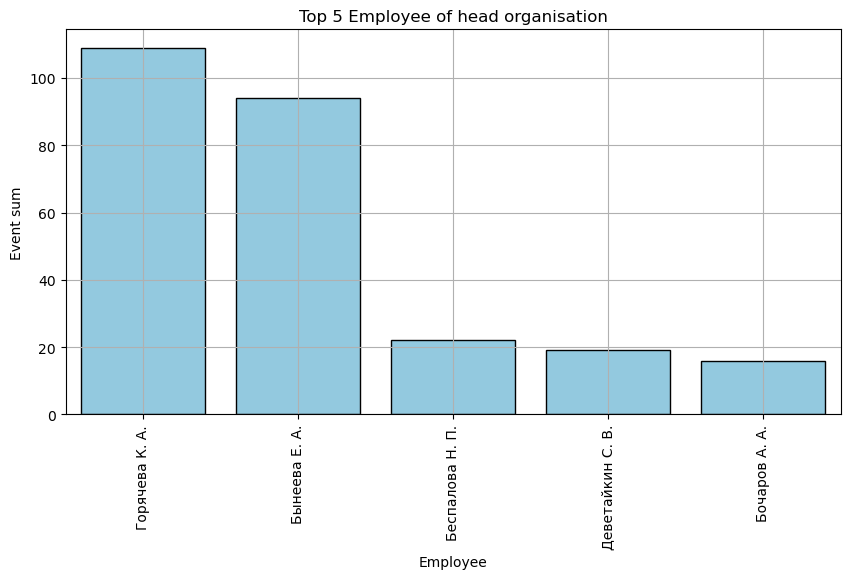

In [208]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=top_5_head['Employee'], y = top_5_head['Event_code'], color='skyblue', edgecolor='black')
plt.xlabel('Employee')
plt.ylabel('Event sum')
plt.title('Top 5 Employee of head organisation')
plt.grid(True)
plt.show()

In [202]:
print('Top 5 head organisation:',top_5_head.groupby(['Employee'])['Event_code'].sum().sort_values(ascending = False))

Top 5 head organisation: Employee
Горячева К. А.      109
Бынеева Е. А.        94
Беспалова Н. П.      22
Деветайкин С. В.     19
Бочаров А. А.        16
Name: Event_code, dtype: int64


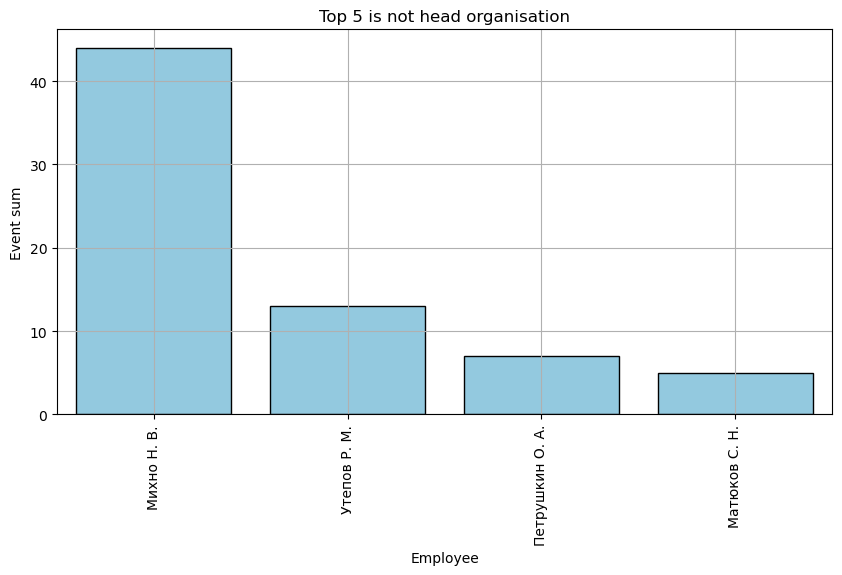

In [184]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(x=top_5_isnot_head['Employee'], y = top_5_isnot_head['Event_code'], color='skyblue', edgecolor='black')
plt.xlabel('Employee')
plt.ylabel('Event sum')
plt.title('Top 5 is not head organisation')
plt.grid(True)
plt.show()

In [204]:
print('Top 5 is not head organisation:',top_5_isnot_head.groupby(['Employee'])['Event_code'].sum().sort_values(ascending = False))

Top 5 head organisation: Employee
Михно Н. В.        44
Утепов Р. М.       13
Петрушкин О. А.     7
Матюков С. Н.       5
Name: Event_code, dtype: int64


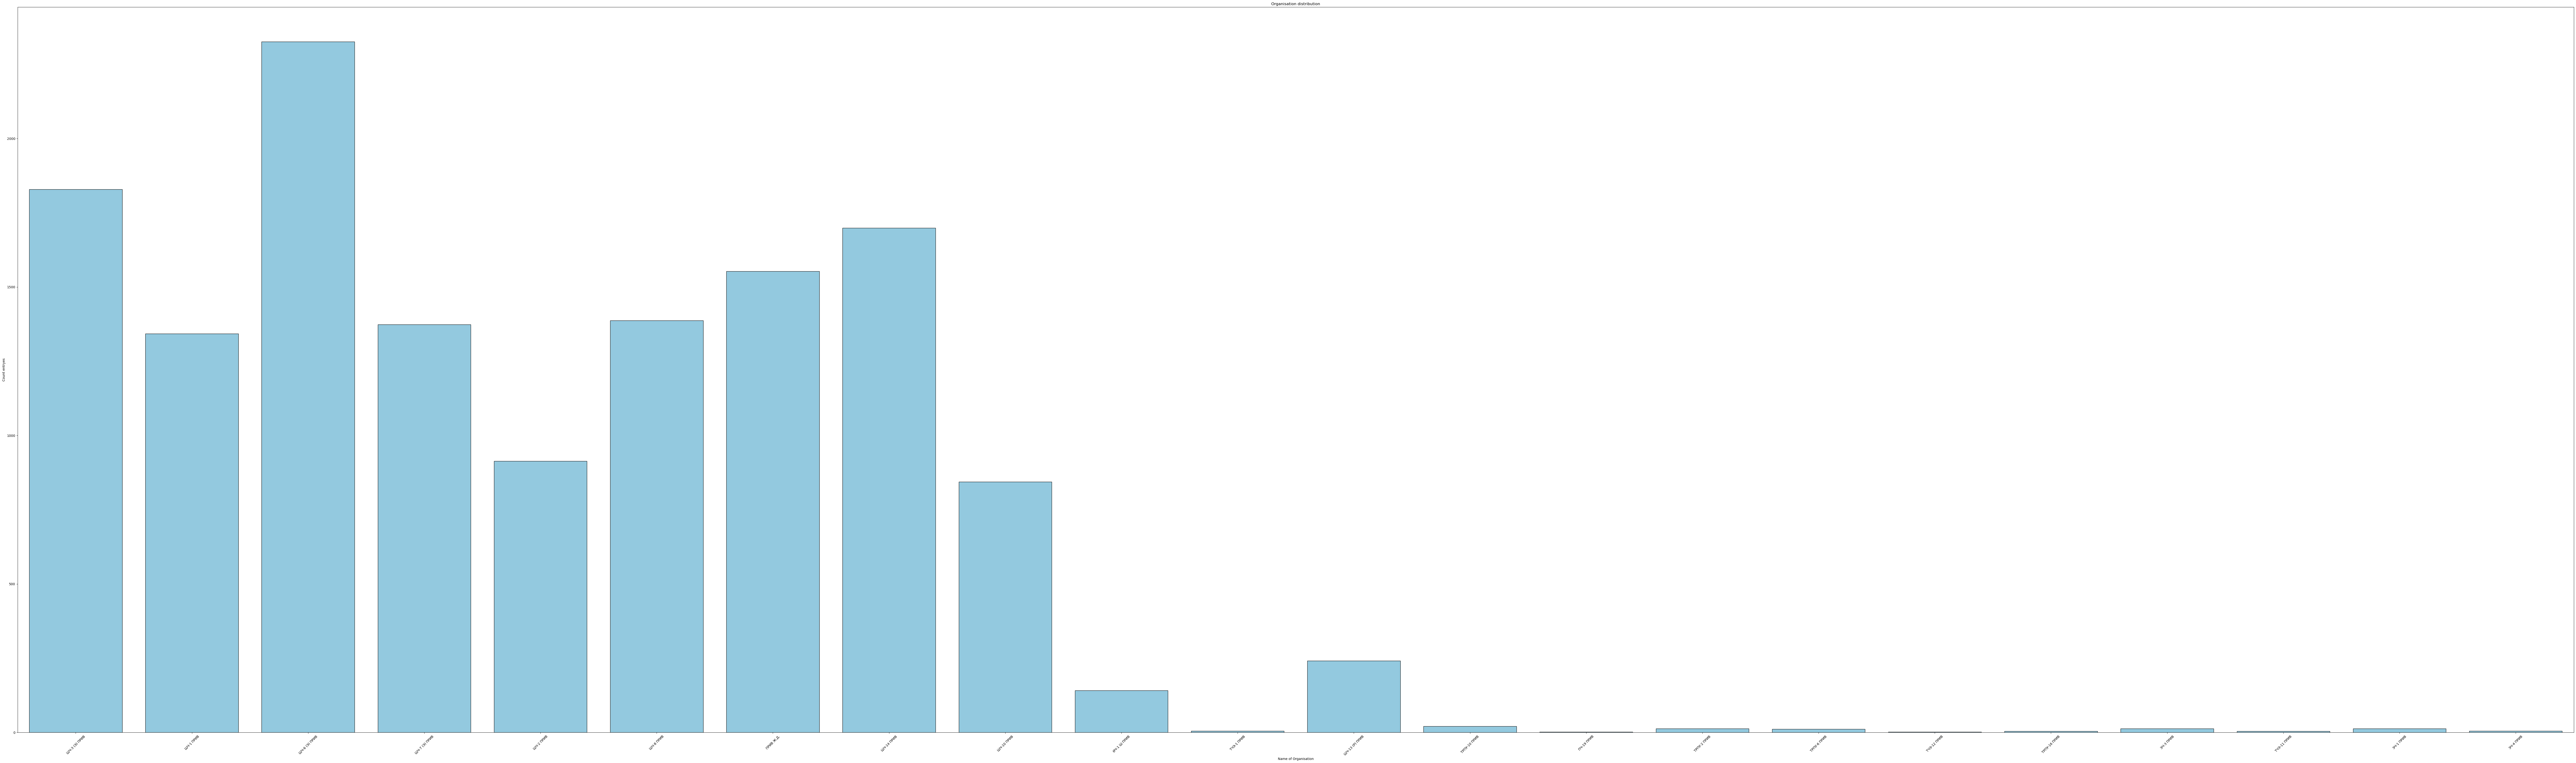

In [40]:
plt.figure(figsize=(140, 40))
sns.countplot(x=filtered_df['Organisation'],  color='skyblue', edgecolor='black')
plt.xlabel('Name of Organisation')
plt.ylabel('Count entryes')
plt.title('Organisation distribution')
plt.xticks(rotation=45)
plt.show()

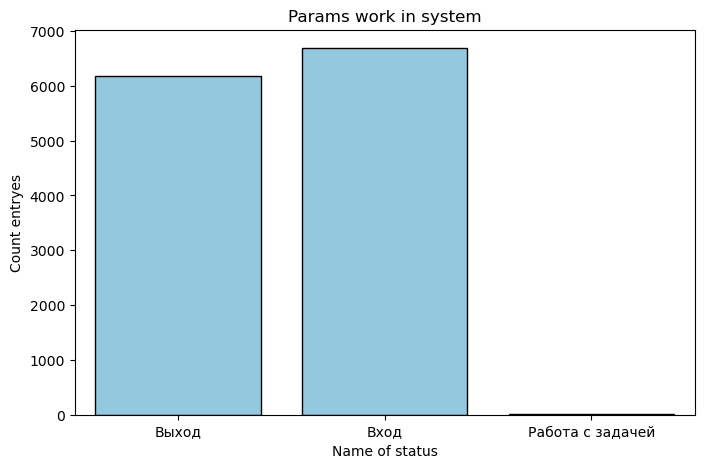

In [193]:
plt.figure(figsize=(8,5))
sns.countplot(x=filtered_df['Event'], color='skyblue', edgecolor='black')
plt.xlabel('Name of status')
plt.ylabel('Count entryes')
plt.title('Params work in system')
#plt.xticks(rotation=45)
plt.show()

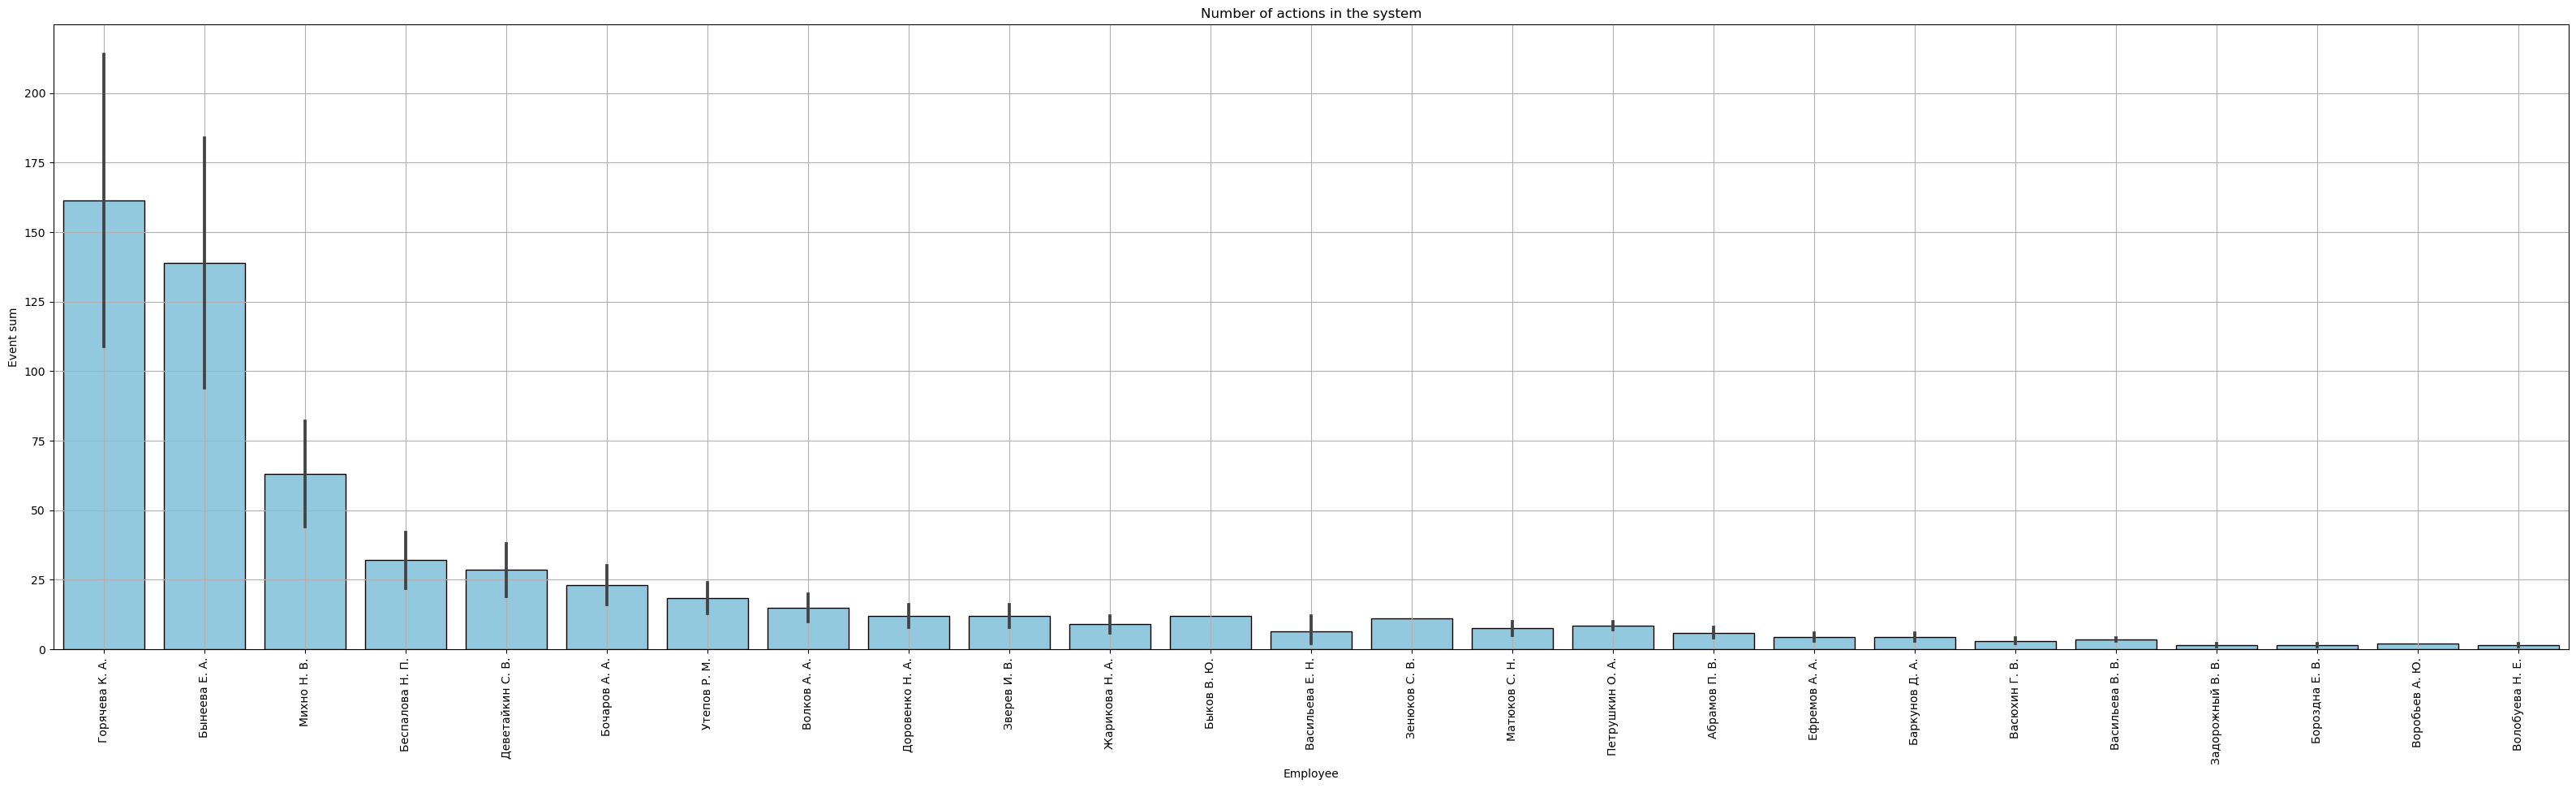

In [187]:
plt.figure(figsize=(40, 10))
plt.xticks(rotation=90)
sns.barplot(x=group_df['Employee'], y = group_df['Event_code'], color='skyblue', edgecolor='black')
plt.xlabel('Employee')
plt.ylabel('Event sum')
plt.title('Number of actions in the system')
plt.grid(True)
plt.show()

# Сonclusion of work

**Top 5 head organisation:**  
Горячева К. А.      109  
Бынеева Е. А.        94  
Беспалова Н. П.      22  
Деветайкин С. В.     19  
Бочаров А. А.        16  

**Top 5 is not head organisation:**  
Михно Н. В.        44  
Утепов Р. М.       13  
Петрушкин О. А.     7  
Матюков С. Н.       5  
The data provided contains user activity data for one railway from '2020-01-09 12:30:24' to '2021-12-05 23:37:12'   
The data contains many omissions and null values that were processed during the data preparation process.  
The analysis did not take into account the work of system administrators and 3 statuses of work in the system were detected in the data "Entry", "Exit", "Work with task".  
During the analysis it was impossible to interpret these statuses and classify them as work in the system and carrying out any actions in the system.  
I assume that Login to the system can be considered as the beginning of work in the system, as well as the status "Work with task".  
We also found anomalies, for example, the number of exits from the mimteme exceeds the number of entrances. It is not clear to what the status "Working with task" refers and why so few users have this status.
Personal recommendations on the results of the analysis.
It is necessary to organise a meeting with developers to discuss the identified nuances.


In [217]:
! pip install gitpython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [219]:
import os
import git



def upload_to_github():
    """
    Функция для автоматической загрузки изменений на GitHub
    """

    # Получение текущего каталога
    current_dir = os.getcwd()

    # Создание объекта git
    repo = git.Repo(current_dir)

    # Отправка изменений на GitHub
    repo.remotes.origin.push()

# Запуск функции после каждого коммита
git.post_commit(upload_to_github)


AttributeError: module 'git' has no attribute 'post_commit'

In [212]:
! pip install git

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
